In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)

X = data.data      # features
y = data.target    # house prices

print(X.head())
print(X.info())
print(X.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    

<Axes: >

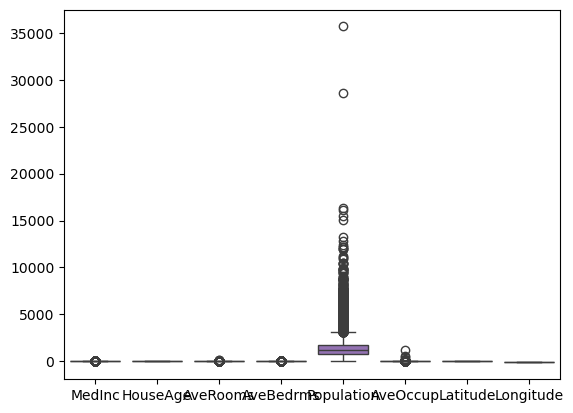

In [3]:
sns.boxplot(data=X)

<Axes: >

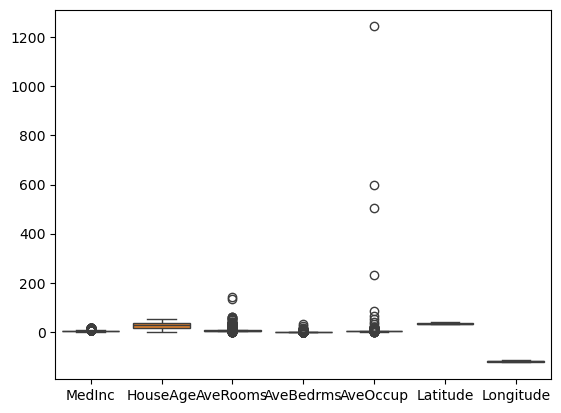

In [4]:
X_new = X.drop(columns=['Population'])
sns.boxplot(data=X_new)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [6]:
def gradient_descent(X, y, lr=0.01, n_iters=1000):
    n, d = X.shape
    Xb = np.c_[np.ones(n), X]      # add bias
    theta = np.zeros(d + 1)

    losses = []

    for _ in range(n_iters):
        y_pred = Xb @ theta
        error = y_pred - y
        loss = np.mean(error ** 2)
        losses.append(loss)

        grad = 2 / n * Xb.T @ error
        theta -= lr * grad

    return theta, losses

**Without Normalization**

In [31]:
theta_raw, losses_raw = gradient_descent(X_train, y_train, lr=1e-7, n_iters=20000)

# Evaluate
Xb_test = np.c_[np.ones(len(X_test)), X_test]
y_pred_raw = Xb_test @ theta_raw

rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred_raw))
r2_raw = r2_score(y_test, y_pred_raw)

print(f"RMSE = {rmse_raw}")
print(f"R-2 = {r2_raw}")

RMSE = 1.1355792087233327
R-2 = 0.022859325561393473


**With Normalization**

<Axes: >

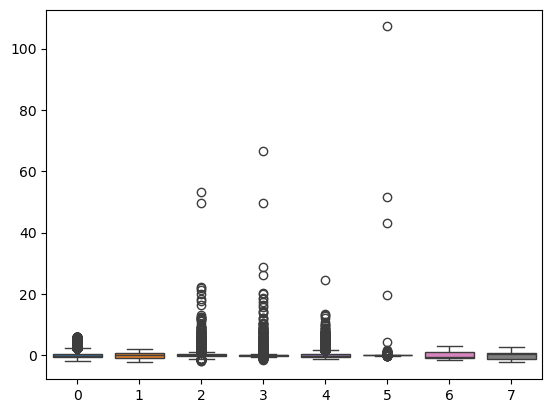

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sns.boxplot(data=X_train_scaled)




In [26]:
theta_scaled, losses_scaled = gradient_descent(X_train_scaled, y_train, lr=0.01, n_iters=2000)

# Evaluate
Xb_test_scaled = np.c_[np.ones(len(X_test_scaled)), X_test_scaled]
y_pred_scaled = Xb_test_scaled @ theta_scaled

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"RMSE = {rmse_scaled}")
print(f"R-2 = {r2_scaled}")

RMSE = 0.7283474389963829
R-2 = 0.5980246502847248


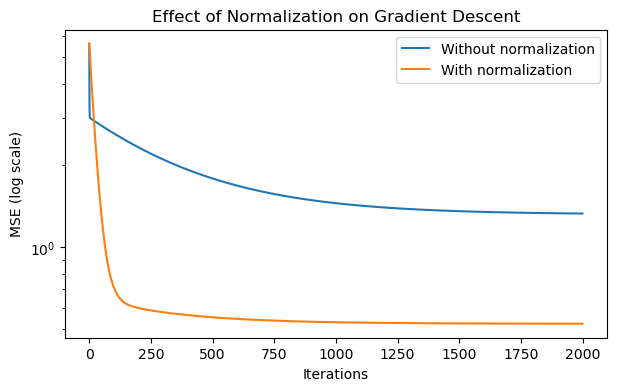

In [10]:
plt.figure(figsize=(7, 4))
plt.plot(losses_raw, label="Without normalization")
plt.plot(losses_scaled, label="With normalization")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("MSE (log scale)")
plt.legend()
plt.title("Effect of Normalization on Gradient Descent")
plt.show()


Text(0, 0.5, 'Target')

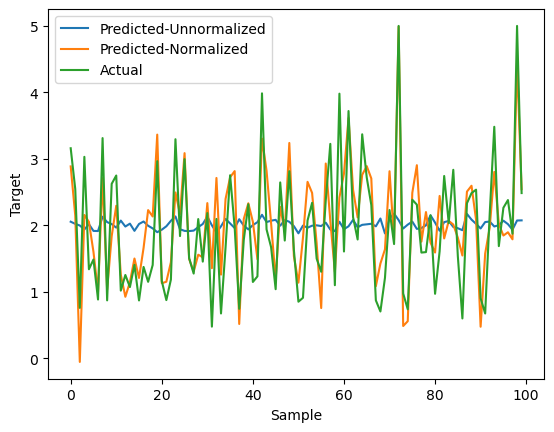

In [27]:
plt.plot(y_pred_raw[:100], label = 'Predicted-Unnormalized')
plt.plot(y_pred_scaled[:100], label = 'Predicted-Normalized')
plt.plot(y_test.values[:100], label = 'Actual')

plt.legend()
plt.xlabel("Sample")
plt.ylabel("Target")